# init 

In [ ]:
!pip install pyneuroml
!pip install libneuroml
import math
from neuroml import NeuroMLDocument
from neuroml import Cell
from neuroml import IonChannelHH
from neuroml import GateHHRates
from neuroml import BiophysicalProperties
from neuroml import MembraneProperties
from neuroml import ChannelDensity
from neuroml import HHRate
from neuroml import SpikeThresh
from neuroml import SpecificCapacitance
from neuroml import InitMembPotential
from neuroml import IntracellularProperties
from neuroml import IncludeType
from neuroml import Resistivity
from neuroml import Morphology, Segment, Point3DWithDiam
from neuroml import Network, Population
from neuroml import PulseGenerator, ExplicitInput
import numpy as np
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation

In [ ]:
# Simulation bits
sim_id = "hn8_network"
simulation = LEMSSimulation(sim_id=sim_id, duration=3000, dt=0.01, simulation_seed=123)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.8.cell.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v1L", quantity="hn1L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v2L", quantity="hn2L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v3L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

simulation.create_output_file(id="display_vR", file_name=sim_id + "vR.dat")
simulation.add_column_to_output_file("display_vR", column_id="v1R", quantity="hn1R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v2R", quantity="hn2R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v3R", quantity="hn3R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v4R", quantity="hn4R_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Generating plot: Membrane potential (Left)
pyNeuroML >>> Saved image to hn8_network-vL.png of plot: Membrane potential (Left)
pyNeuroML >>> Generating plot: Membrane potential (Right)
pyNeuroML >>> Saved image to hn8_network-vR.png of plot: Membrane potential (Right)


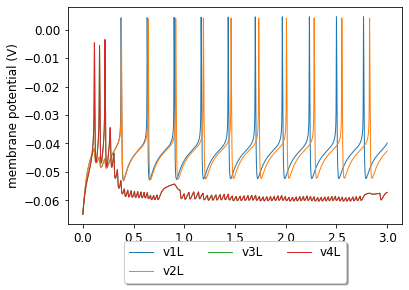

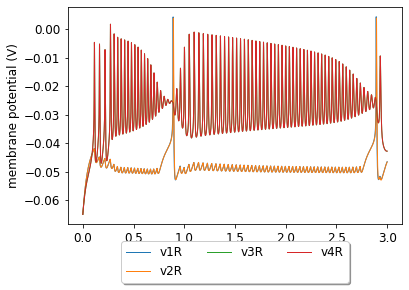

In [27]:
# Plot the data
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]], [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]], "Membrane potential (Left)", labels = ["v1L", "v2L", "v3L", "v4L"], show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)", yaxis="membrane potential (V)")

data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]], [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]], "Membrane potential (Right)", labels=["v1R", "v2R", "v3R", "v4R"], show_plot_already=False, save_figure_to=sim_id + "-vR.png", xaxis="time (s)", yaxis="membrane potential (V)")